# Overview

VLA 22A-020 observed NaCl and KCl transitions toward Sgr B2 in the K band.

PRIMOS detected NaCl 2-1 ?emission or absorption? (in 5 hyperfine transitions) at 26.01 GHz at T$_A^*\sim0.05$ K.  The GBT beam at 26 GHz is ~30"

In [3]:
import numpy as np
from astropy import units as u

In [4]:
from spectral_cube import SpectralCube

In [5]:
nacl21rest = 26.0518979*u.GHz

In [6]:
gbtbeam = (1.22 * nacl21rest.to(u.m, u.spectral()) / (100*u.m)).to(u.arcsec, u.dimensionless_angles())
gbtbeamarea = (2*np.pi*(gbtbeam/2.35)**2)
gbtbeam

<Quantity 28.95784901 arcsec>

This gives a flux density:

In [7]:
(0.05*u.K ).to(u.Jy, u.brightness_temperature(frequency=nacl21rest, beam_area=gbtbeamarea))

<Quantity 0.02338014 Jy>

The observations achieved a beam size about 0.4"x0.2" with robust=2:

In [8]:
cd ../imaging_Darray/

/orange/adamginsburg/sgrb2/22A-020/imaging_Darray


In [12]:
cube = SpectralCube.read('KbandDarray.center.robust0.spw13.big-coarse.liteclean.image')
vlabeam = cube.beams.common_beam()
vlabeam

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Beam: BMAJ=5.019992947832322 arcsec BMIN=2.0791804341136486 arcsec BPA=-15.371535693486829 deg

If the emission were concentrated into a single beam, then the peak brightness would be:

In [13]:
0.05*u.K * (gbtbeamarea/vlabeam.sr).decompose()

<Quantity 4.03354624 K>

The typical uncertainty achieved in our data is:

In [14]:
uncertainty = cube.std()
uncertainty

<Quantity 0.079532 Jy / beam>

In [15]:
uncertainty.to(u.K, u.brightness_temperature(nacl21rest, beam_area=vlabeam))

<Quantity 13.72087607 K>

This is per channel with width:

In [16]:
cube.with_spectral_unit(u.km/u.s, rest_value=nacl21rest, velocity_convention='radio').spectral_axis.diff().mean()

<Quantity -0.35961704 km / s>

### listobs:  

https://data.rc.ufl.edu/secure/adamginsburg/SgrB2/22A-020/22A-020_sb41854998_1_1.59785.110016307866/pipeline-20220726T015648/html/t2-1.html?sidebar=sidebar_22A_020_sb41854998_1_1_59785_110016307866_ms&subpage=listobs.txt


In [18]:
pth = '/orange/adamginsburg/sgrb2/22A-020/imaging_Darray/KbandDarray.center.robust0.spw13.big-coarse.liteclean.image'

if not os.path.exists(pth+".contsub.fits"):
    naclcube = SpectralCube.read(pth).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nacl21rest)
    cont = naclcube.median(axis=0)
    contsub = naclcube - cont
    contsub.write(pth+".contsub.fits")
naclcube = SpectralCube.read(pth+".contsub.fits", use_dask=True).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nacl21rest)
naclcube

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskVaryingResolutionSpectralCube with shape=(1024, 500, 500) and unit=Jy / beam and chunk size (256, 250, 250):
 n_x:    500  type_x: RA---SIN  unit_x: deg    range:   266.794014 deg:  266.872811 deg
 n_y:    500  type_y: DEC--SIN  unit_y: deg    range:   -28.412494 deg:  -28.343189 deg
 n_s:   1024  type_s: VRAD      unit_s: km / s  range:     -124.576 km / s:     243.312 km / s

In [19]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['image.interpolation'] = 'none'
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b93fceb5dc0>

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.822e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.893e-01 [aplpy.core]


<Figure size 1440x1440 with 0 Axes>

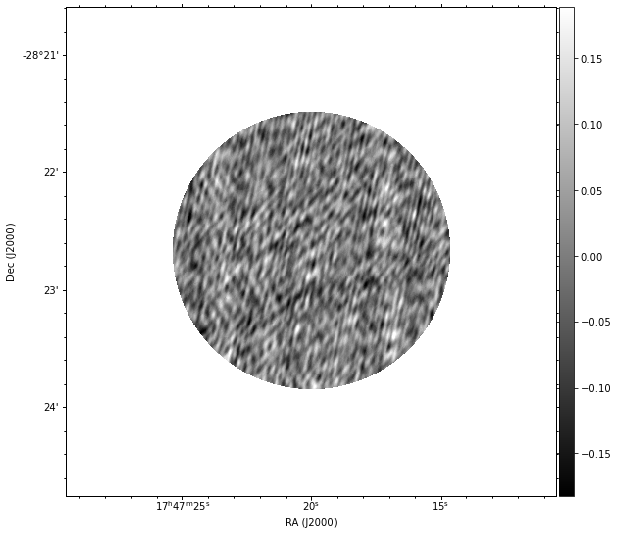

In [20]:
pl.figure(figsize=(20,20))
m0 = naclcube.spectral_slab(40*u.km/u.s, 76*u.km/u.s).moment0(axis=0)
m0.quicklook()

In [21]:
naclcube

DaskVaryingResolutionSpectralCube with shape=(1024, 500, 500) and unit=Jy / beam and chunk size (256, 250, 250):
 n_x:    500  type_x: RA---SIN  unit_x: deg    range:   266.794014 deg:  266.872811 deg
 n_y:    500  type_y: DEC--SIN  unit_y: deg    range:   -28.412494 deg:  -28.343189 deg
 n_s:   1024  type_s: VRAD      unit_s: km / s  range:     -124.576 km / s:     243.312 km / s

INFO: Auto-setting vmin to  7.580e-03 [aplpy.core]
INFO: Auto-setting vmax to  3.127e-02 [aplpy.core]


<Figure size 1440x1440 with 0 Axes>

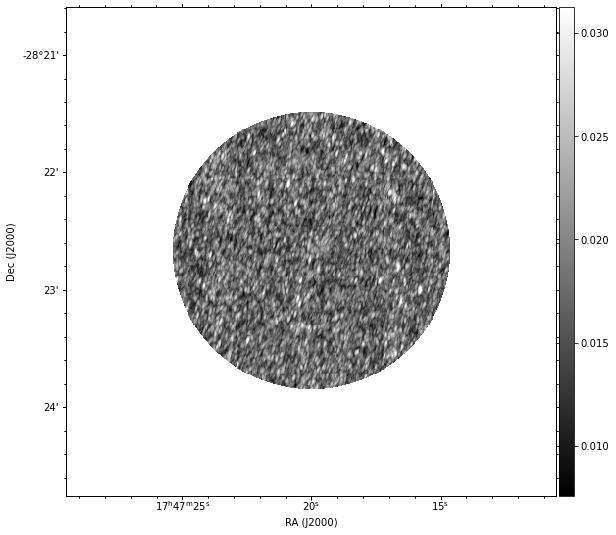

In [22]:
pl.figure(figsize=(20,20))
mx = naclcube.spectral_slab(40*u.km/u.s, 76*u.km/u.s).max(axis=0)
mx.quicklook()

In [23]:
import regions

In [24]:
hiiregions = regions.Regions.read("../regions_2018paper/SgrB2_1.3cm_hiiRegions_masked_Done.reg")
named_regions = {r.meta['text']: r for r in hiiregions if 'text' in r.meta}

In [25]:
targets = [('K1', 'K2', 'K3'), 'K4', 'Z10.24', 'I', 'E', 'B', 'G', ('F2', 'F1', 'F10.303', 'F3', 'F4')]

In [31]:
def getreg(tgt):
    if isinstance(tgt, tuple):
        reg = regions.Regions([named_regions[x] for x in tgt])
    else:
        reg = regions.Regions([named_regions[tgt]])                              
    return reg

In [32]:
fns = ['KbandDarray.center.robust0.spw13.big-coarse.liteclean.image',
      ]

In [33]:
cubes = [SpectralCube.read(fn, use_dask=True) for fn in fns]

In [34]:
import warnings
warnings.filterwarnings('ignore')

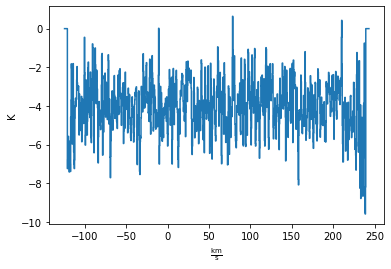

In [35]:
cube=cubes[0]
meanspec = cube.subcube_from_regions([named_regions['K1']]).with_spectral_unit(u.km/u.s, rest_value=nacl21rest, velocity_convention='radio').to(u.K).mean(axis=(1,2))
meanspec[1:-1].with_spectral_unit(u.km/u.s).quicklook()

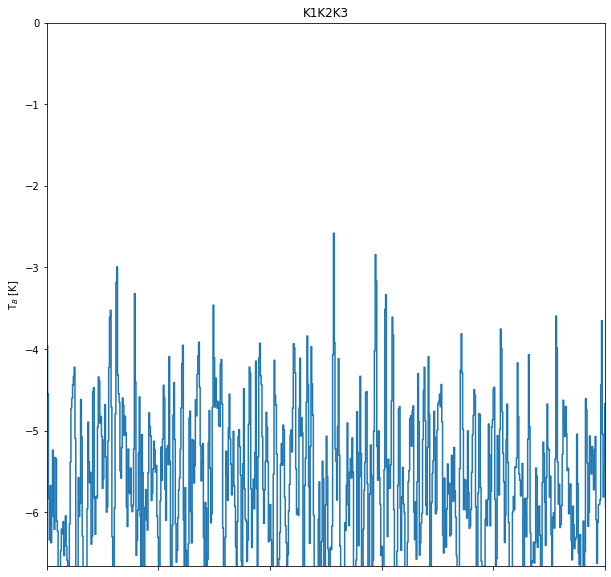

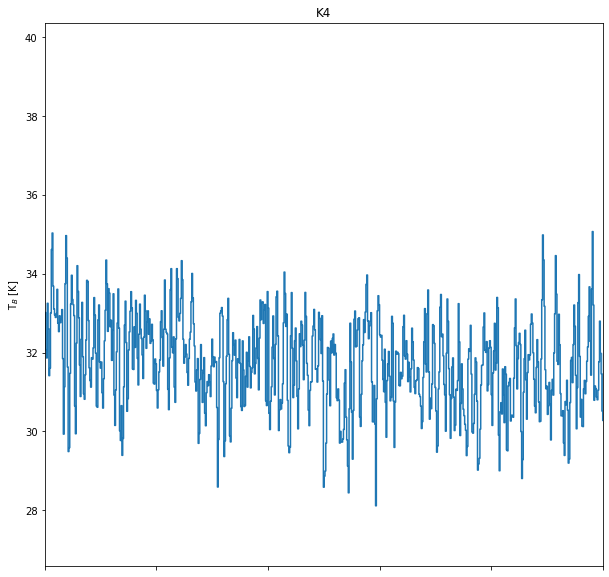

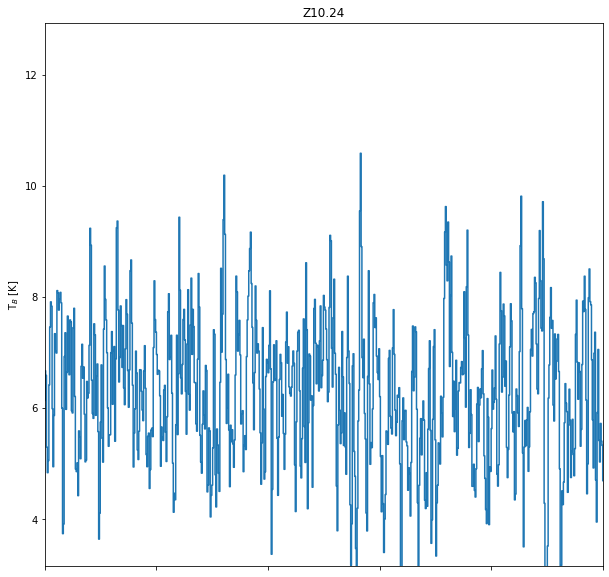

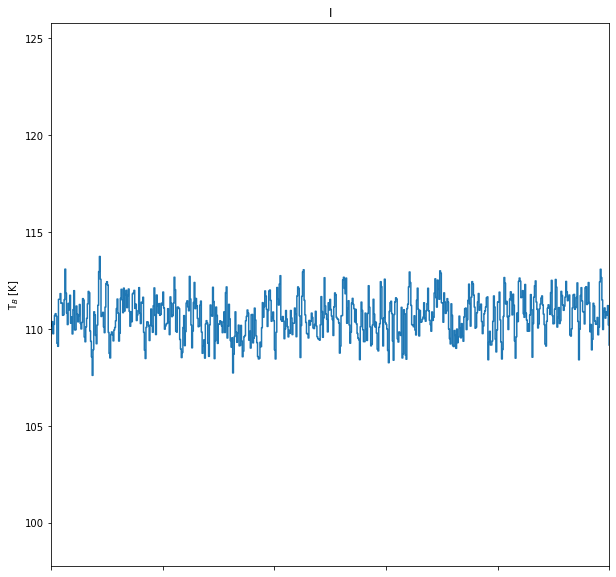

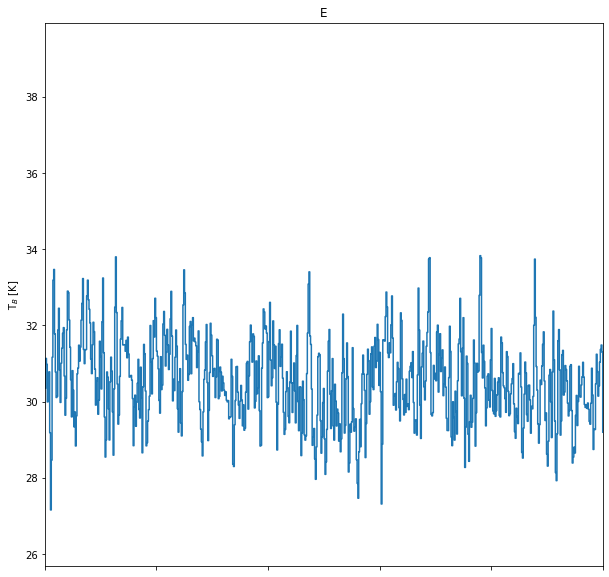

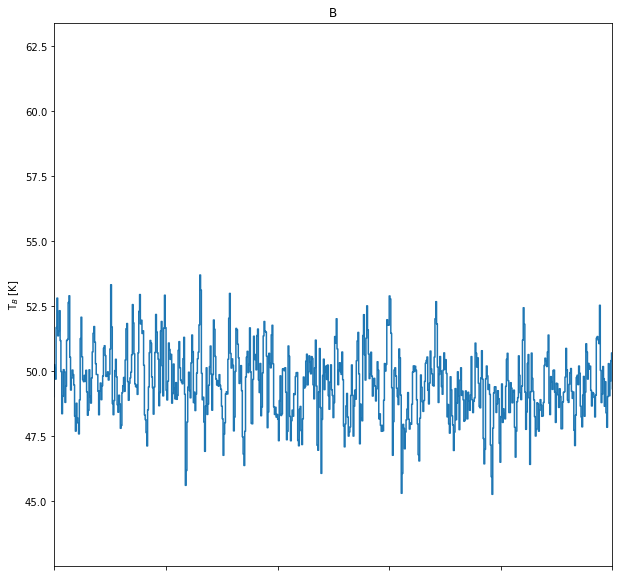

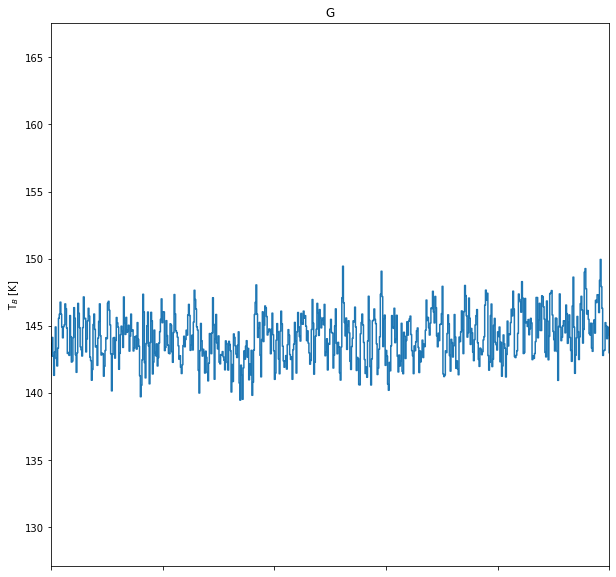

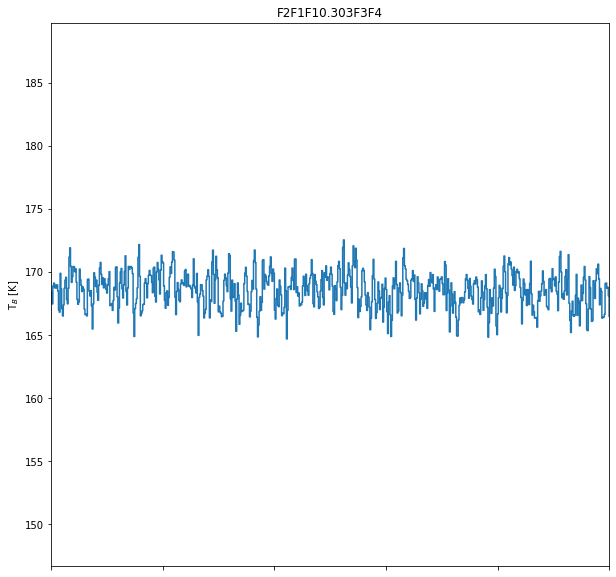

In [36]:
for tgt in targets:
    reg = getreg(tgt)
    name = "".join(tgt)
    fig = pl.figure(figsize=(10,10))
    for ii, cube in enumerate(cubes):
        ax = pl.subplot(1,1,1)
        try:
            meanspec = cube.subcube_from_regions(reg).with_spectral_unit(u.km/u.s, rest_value=nacl21rest, velocity_convention='radio').to(u.K).mean(axis=(1,2))
        except ValueError:
            continue
        if ii < 3:
            meanspec = meanspec[3:-3].with_spectral_unit(u.km/u.s) # chop out bad edge pixels
        ax.plot(meanspec.spectral_axis, meanspec.value, drawstyle='steps-mid')
        ax.set_xlim(-50, 200)
        ax.set_ylim(np.percentile(meanspec.value, 5)*0.9, np.percentile(meanspec.value, 99.99)*1.1)
        if ii == 3:
            ax.set_xlabel("V$_{LSR}$ [km/s]")
        else:
            ax.set_xticklabels('')
            ax.set_xlabel("")
        ax.set_ylabel("T$_B$ [K]")
        if ii == 0:
            ax.set_title(name)
    fig.savefig(f"../figures/{name}_Kband_spectra.png")

In [37]:
pwd

'/orange/adamginsburg/sgrb2/22A-020/imaging_Darray'

In [38]:
from astropy.table import Table
from astropy import constants

In [39]:
from astropy.table import Table
primos = Table.read('../PRIMOS_spectrum.txt', format='ascii.no_header')
pfrq = (primos['col1'] * u.MHz * (1-64*u.km/u.s/constants.c)).to(u.GHz)
pamp = primos['col2'] * u.K

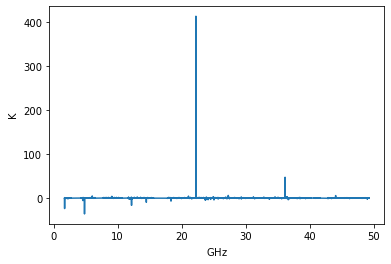

In [40]:
pl.plot(pfrq,pamp)

In [41]:
from astropy.coordinates import SkyCoord

In [42]:
primos_center = SkyCoord('17h47m19.8', '-28:22:17', unit=(u.h, u.deg), frame='fk5')

In [43]:
import glob
import regions
from astropy import wcs
from astropy.io import fits

In [44]:
mkdir -p primos_spectra/pngs

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
pfrq

<Quantity [ 1.7098067 ,  1.70983112,  1.70985553, ..., 49.25475573,
           49.25478015, 49.25480456] GHz>

In [49]:
from astroquery.splatalogue import Splatalogue

In [52]:
Splatalogue.query_lines(25.704*u.GHz, 25.714*u.GHz, chemical_name='Ammonia')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str6,str7,int64,int64,float64,float64,str19,float64,float64,float64,float64,int64,float64,float64,float64,float64,str8
NH3v=0,Ammonia,--,--,25.7124878,5e-06,"7(7)0a-7(7)0s,F=6-7",-6.3805,0.33493,0.155,-8.59365,--,374.2301,538.43054,375.08778,539.66454,TopModel
NH3v=0,Ammonia,--,--,25.7128274,5e-06,"7(7)0a-7(7)0s,F=8-7",-6.38,0.33531,0.155,-8.70965,--,374.2301,538.43054,375.08779,539.66455,TopModel


In [53]:
Splatalogue.query_lines(22.914*u.GHz, 22.926*u.GHz, chemical_name='Ammonia')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str6,str7,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8
NH3v=0,Ammonia,--,--,22.9234079,5e-06,"7(6)0a-7(6)0s,F=6-7",-6.4135,0.49213,0.227,-8.87715,--,422.4749,607.84365,423.23954,608.94379,TopModel
NH3v=0,Ammonia,--,--,22.923601,5e-06,"7(6)0a-7(6)0s,F=8-7",-6.413,0.49269,0.228,-8.99316,--,422.4749,607.84365,423.23955,608.9438,TopModel
NH3v=0,Ammonia,22.923763,6.5e-06,--,--,"7(6)--7(-6)+,F=6-7",-6.4146,1.47088,0.0,-8.40163,--,421.6649,606.68568,422.42955,607.78586,CDMS
NH3v=0,Ammonia,22.9249346,1.5e-06,--,--,"7(6)--7(-6)+,F=7-7",-4.6771,80.35886,0.0,-6.72626,--,421.6649,606.68568,422.42959,607.78591,CDMS
NH3v=0,Ammonia,22.9249362,1.5e-06,--,--,"7(6)--7(-6)+,F=6-6",-4.7341,70.47475,0.0,-6.72111,--,421.6648,606.68554,422.42949,607.78577,CDMS
NH3v=0,Ammonia,--,--,22.92494,5e-06,"7(6)0a-7(6)0s,F=7-7",-4.6768,26.8361,12.402,-7.20257,--,422.4749,607.84365,423.23959,608.94386,TopModel
NH3v=0,Ammonia,--,--,22.92494,5e-06,"7(6)0a-7(6)0s,F=6-6",-4.7323,23.61671,10.914,-7.19593,--,422.4749,607.84365,423.23959,608.94386,TopModel
NH3v=0,Ammonia,--,--,22.92494,5e-06,"7(6)0a-7(6)0s,F=8-8",-4.6136,31.03984,14.345,-7.19373,--,422.4749,607.84365,423.23959,608.94386,TopModel
NH3v=0,Ammonia,--,--,22.92494,1e-05,7(6)0a-7(-6)0s,-4.1844,81.91309,0.0,-6.71794,--,421.6649,606.67824,422.42959,607.77846,JPL


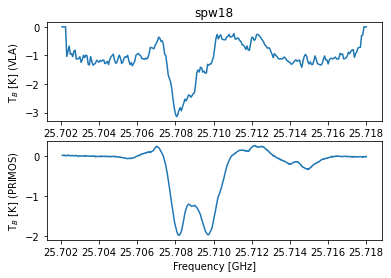

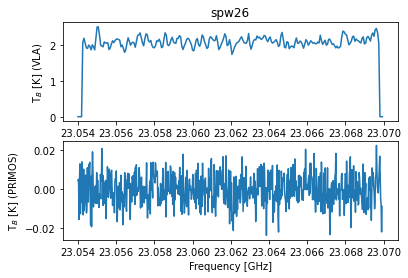

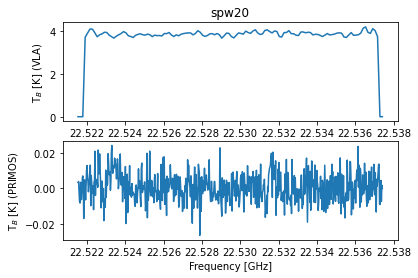

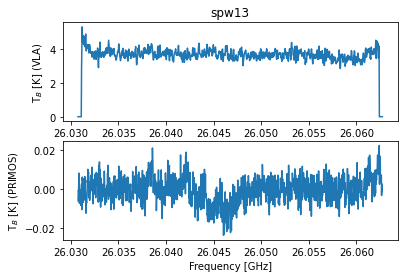

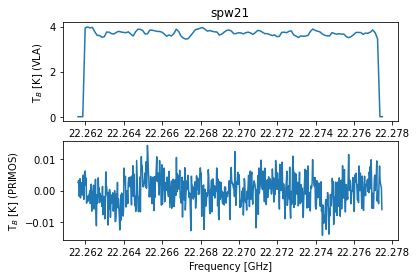

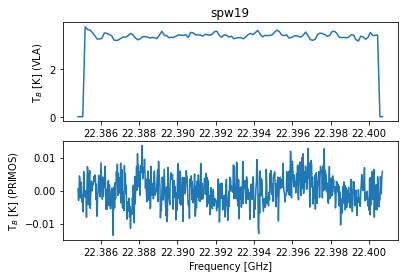

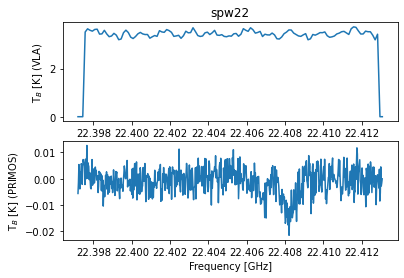

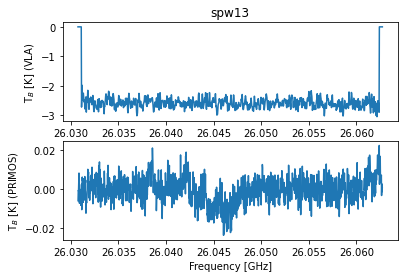

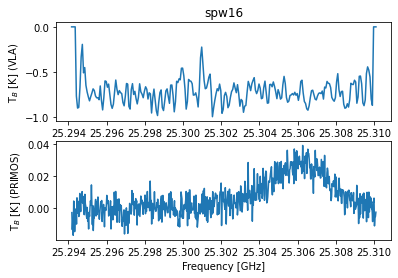

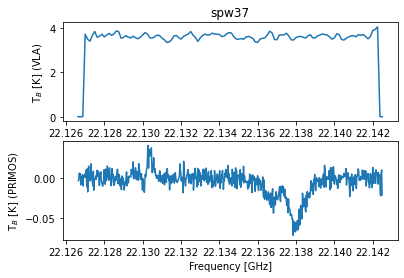

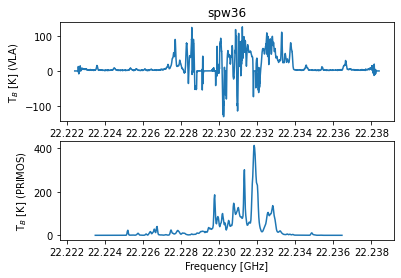

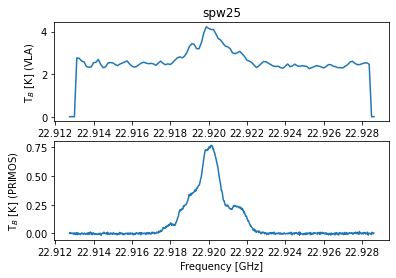

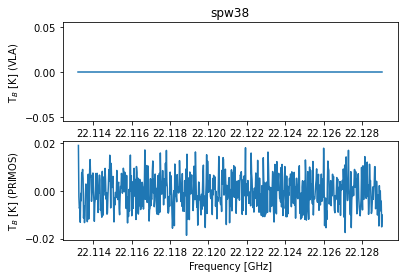

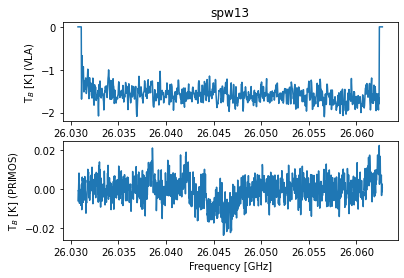

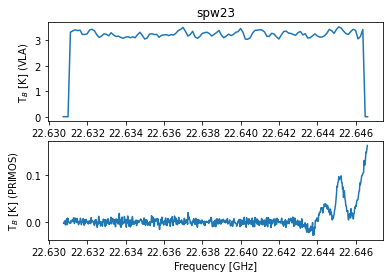

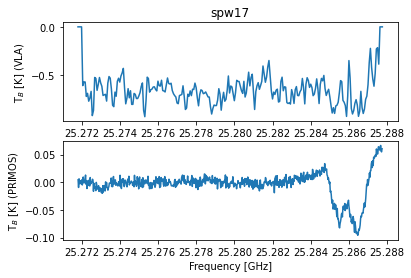

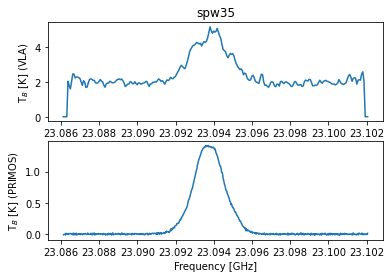

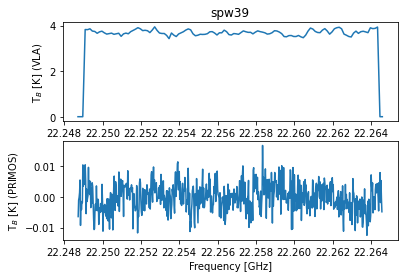

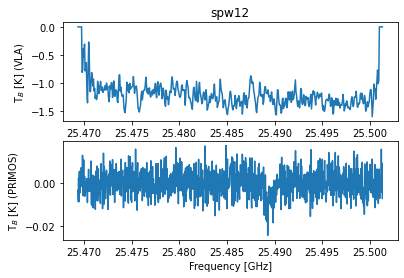

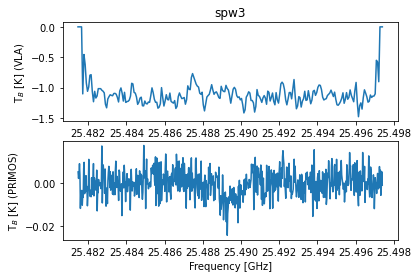

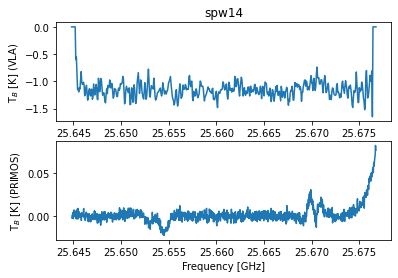

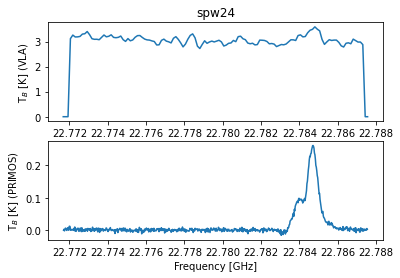

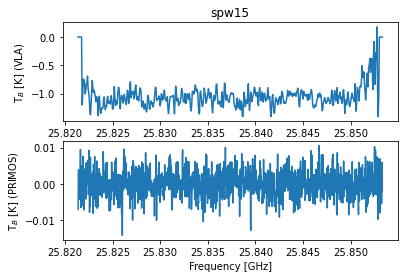

In [47]:
for fn in glob.glob("Kband*.image"):
    if 'continuum' in fn:
        continue
    specfn = f'primos_spectra/{fn}.meanspec.fits'
    if not os.path.exists(specfn):
        cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)
        # estimate of GBT beam
        primos_fwhm = (cube.spectral_axis.mean().to(u.m, u.spectral()) / (100*u.m)).to(u.arcsec, u.dimensionless_angles())
        aperture = regions.CircleSkyRegion(center=primos_center, radius=primos_fwhm/2)
        try:
            subcube = cube.subcube_from_regions([aperture])
        except ValueError as ex:
            continue
        meanspec = subcube.mean(axis=(1,2)).to(u.K)
        hdu = meanspec.hdu
        hdu.writeto(specfn)
        xax = meanspec.spectral_axis.to(u.GHz)
        yax = meanspec.value
    else:
        hdu = fits.open(specfn)[0]
        yax = hdu.data
        xax = wcs.WCS(hdu.header).pixel_to_world(np.arange(len(yax))).to(u.GHz)
    
    fig = pl.figure()
    ax = fig.add_subplot(2,1,1)
    ax.plot(xax, yax)
    ax.set_xlabel("Frequency [GHz]")
    ax.set_ylabel("T$_B$ [K] (VLA)")
    
    try:
        spw = [x for x in fn.split(".") if 'spw' in x][0]
        ax.set_title(spw)
    except:
        ax.set_title(fn)
    
    # make sure we're in GHz units
    assert xax.max() < 50*u.GHz
    assert pfrq.unit == u.GHz
    assert xax.unit == u.GHz
    
    sel = (pfrq > xax.min()) & (pfrq < xax.max())
    assert sel.sum() > 0
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(pfrq[sel], pamp[sel])
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xlabel("Frequency [GHz]")
    ax2.set_ylabel("T$_B$ [K] (PRIMOS)")
    
    fig.savefig(f'primos_spectra/pngs/{fn}.meanspec.png', bbox_inches='tight')

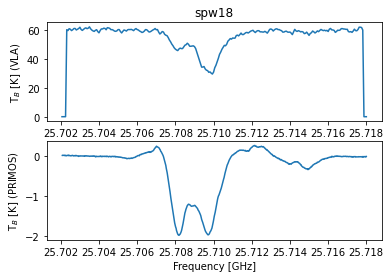

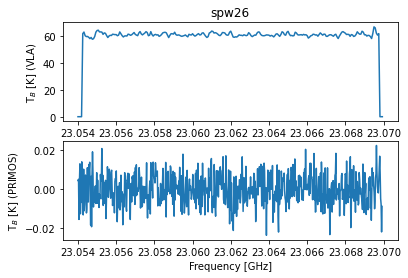

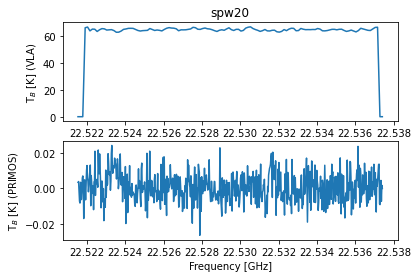

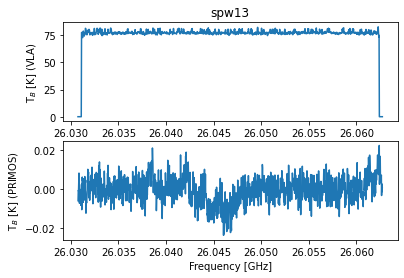

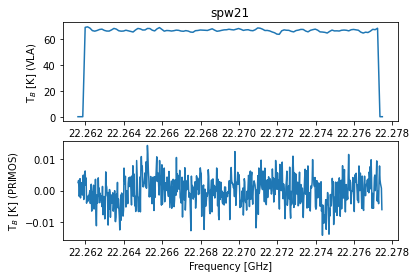

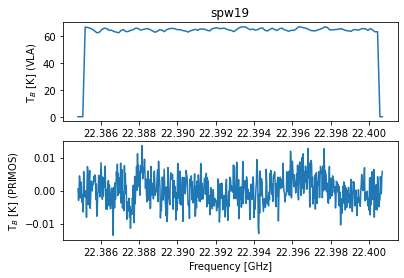

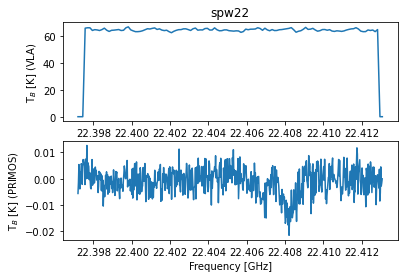

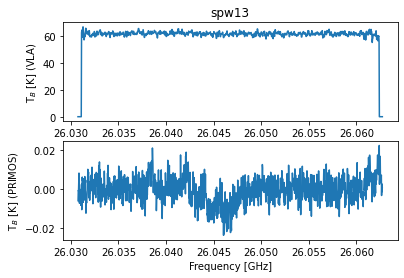

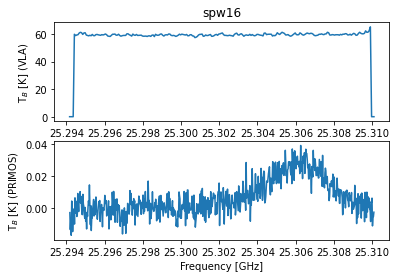

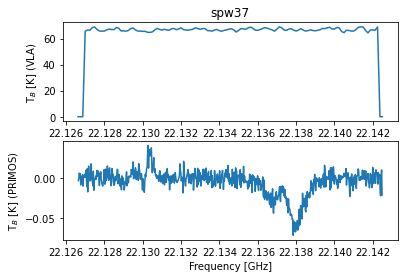

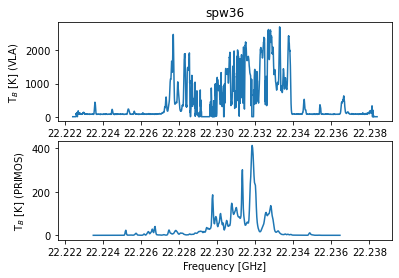

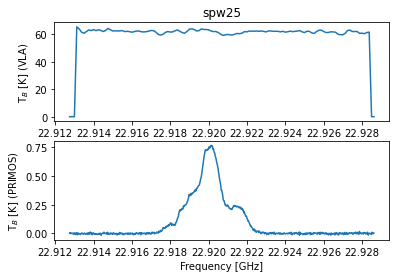

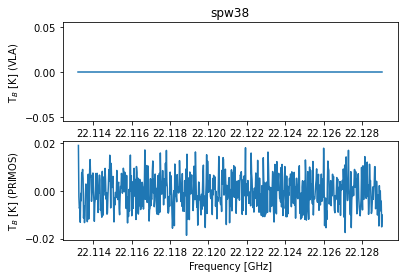

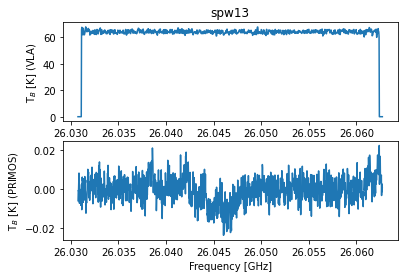

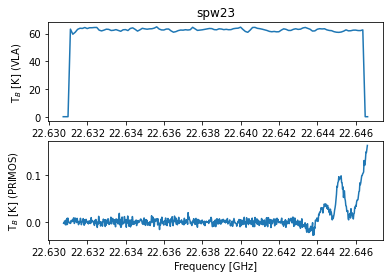

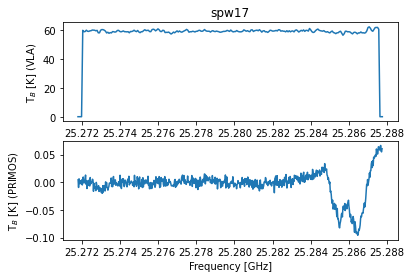

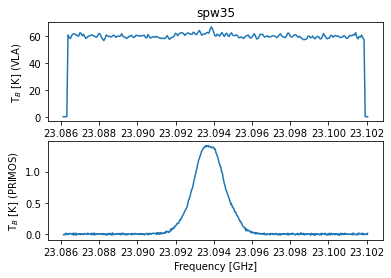

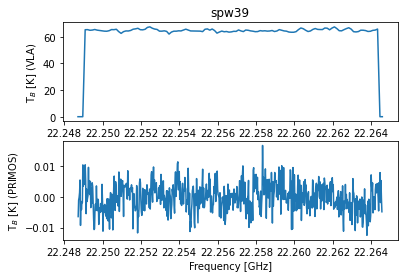

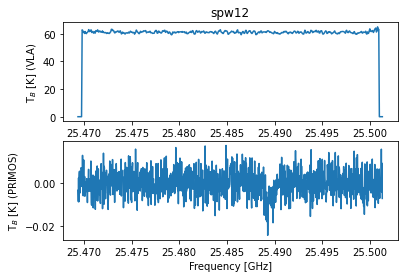

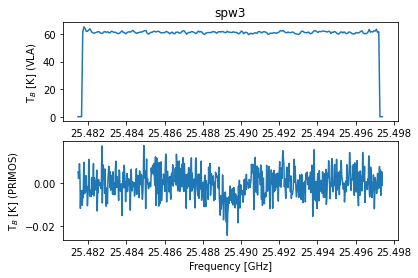

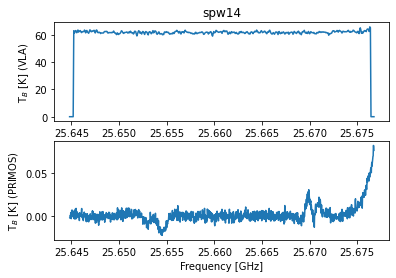

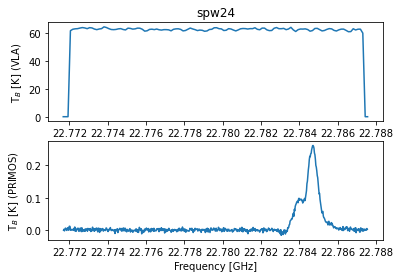

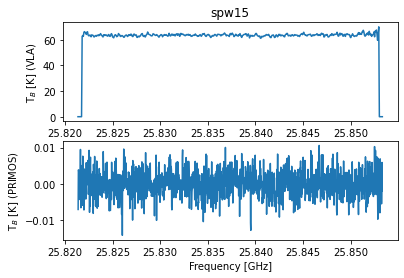

In [48]:
for fn in glob.glob("Kband*.image"):
    if 'continuum' in fn:
        continue
    specfn = f'primos_spectra/{fn}.maxspec.fits'
    if not os.path.exists(specfn):
        cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)
        # estimate of GBT beam
        primos_fwhm = (cube.spectral_axis.mean().to(u.m, u.spectral()) / (100*u.m)).to(u.arcsec, u.dimensionless_angles())
        aperture = regions.CircleSkyRegion(center=primos_center, radius=primos_fwhm/2)
        try:
            subcube = cube.subcube_from_regions([aperture])
        except ValueError as ex:
            continue
        maxspec = subcube.max(axis=(1,2)).to(u.K)
        hdu = maxspec.hdu
        hdu.writeto(specfn)
        xax = maxspec.spectral_axis.to(u.GHz)
        yax = maxspec.value
    else:
        hdu = fits.open(specfn)[0]
        yax = hdu.data
        xax = wcs.WCS(hdu.header).pixel_to_world(np.arange(len(yax))).to(u.GHz)
    
    fig = pl.figure()
    ax = fig.add_subplot(2,1,1)
    ax.plot(xax, yax)
    ax.set_xlabel("Frequency [GHz]")
    ax.set_ylabel("T$_B$ [K] (VLA)")
    
    spw = [x for x in fn.split(".") if 'spw' in x][0]
    ax.set_title(spw)
    
    # make sure we're in GHz units
    assert xax.max() < 50*u.GHz
    assert pfrq.unit == u.GHz
    assert xax.unit == u.GHz
    
    sel = (pfrq > xax.min()) & (pfrq < xax.max())
    assert sel.sum() > 0
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(pfrq[sel], pamp[sel])
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xlabel("Frequency [GHz]")
    ax2.set_ylabel("T$_B$ [K] (PRIMOS)")
    
    fig.savefig(f'primos_spectra/pngs/{fn}.maxspec.png', bbox_inches='tight')